In [43]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [44]:
border_states = pd.read_csv('/Users/andy/ws/ctpsws-clients/lessons/src/lessons/bfa/Border_Regions.csv')

In [45]:
border_states.rename(columns={'Unnamed: 0':'State'}, inplace=True )
border_states['is_border'] = border_states['State']
border_states = border_states[ ['is_border'] + [ col for col in border_states.columns if col != 'is_border' ]]
no_totals = border_states[['Total' not in each for each in border_states['State']]]
no_totals['State'] = no_totals['State'].apply(lambda x: x.replace("Border Region", ""))
no_totals['State'] = no_totals['State'].apply(lambda x: x.replace("Non-", ""))
for border_state in ['Arizona', 'California', 'New Mexico', 'Texas']:
    no_totals['is_border'] = no_totals['is_border'].apply(lambda x: x.replace(border_state, ""))

In [46]:
no_totals

,is_border,State,Total number of discharges,"Rate of discharges per 100,000 population","Age/sex adjusted rate of discharges per 100,000 population","Mean length of stay, days",Aggregate number of days in the hospital,"Number of inpatient days per 100,000 population","Age/sex adjusted number of inpatient days per 100,000 population","Mean cost per stay, $","Aggregate costs for all hospital stays, $","Costs for inpatient stays per capita, $","Age/sex adjusted costs for inpatient stays per capita, $"
7,Border Region,Arizona,1252.0,90.047714,74.961396,4.662141,5837.0000,419.815100,342.624291,24651.58359,3.086378e+07,22.198187,18.145457
8,Border Region,California,2437.0,69.333685,68.973674,4.260156,10382.0000,295.372311,293.190796,31180.62332,7.598718e+07,21.618675,21.378930
9,Border Region,New Mexico,426.0,122.977795,105.504872,5.035211,2145.0000,619.219178,512.681639,26289.94718,1.119952e+07,32.330797,26.671282
10,Border Region,Texas,3298.0,117.776376,137.829240,4.974227,16405.0000,585.846408,682.644694,19488.46604,6.427296e+07,22.952809,26.682367
12,Non-Border Region,Arizona,4387.0,78.656947,68.937655,4.452017,19531.0000,350.182093,301.148243,25642.61381,1.124941e+08,20.169697,17.354124
13,Non-Border Region,California,30259.0,83.643140,81.231942,3.989865,120729.3315,333.724855,322.233193,29718.08437,8.992395e+08,24.857139,23.872248
14,Non-Border Region,New Mexico,1334.0,76.637861,67.200964,4.344078,5795.0000,332.920845,284.985042,22235.54782,2.966222e+07,17.040848,14.591456
15,Non-Border Region,Texas,24940.0,98.296696,101.943718,4.853468,121045.5040,477.079918,490.837047,23411.45442,5.838817e+08,23.012686,23.597964


<AxesSubplot:xlabel='State'>

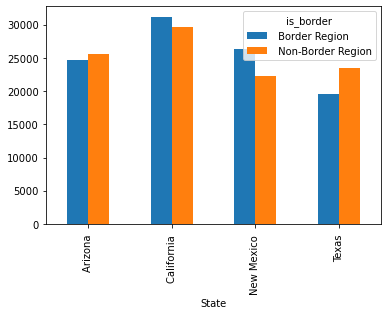

In [47]:
pd.pivot_table(no_totals.reset_index(),
               index='State', columns='is_border', values='Mean cost per stay, $'
              ).plot.bar()

<AxesSubplot:xlabel='is_border'>

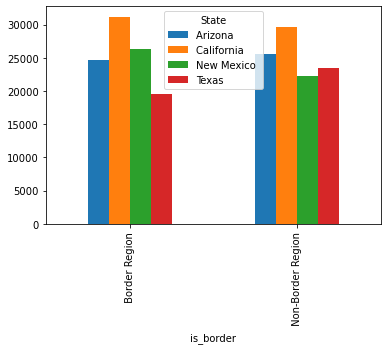

In [48]:
pd.pivot_table(no_totals.reset_index(),
               index='is_border', columns='State', values='Mean cost per stay, $'
              ).plot.bar()
